# 3. Ciência de Dados em Python 
## 3.4. Preparação de Dados
### Tratamento de Valores Anômalos e Transformações de Dados

Este notebook é parte do material do Curso de Treinamento em IA criado pelo IFMA/DComp e financiado pelo SOFTEX, 2023.



# Configs

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [ ]:
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

# Datasets

In [ ]:
taxi_df = sns.load_dataset("taxis")

In [ ]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [ ]:
taxi_df.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [ ]:
taxi_df.describe(exclude='number')

,pickup,dropoff,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433,6389,6407,6388,6407,6388
unique,6414,6425,2,2,194,203,4,5
top,2019-03-13 10:57:06,2019-03-04 18:08:13,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,2,2,5451,4577,230,245,5268,5206


In [ ]:
tips_df = sns.load_dataset("tips")

In [ ]:
tips_df.sample(n=5)

,total_bill,tip,sex,smoker,day,time,size
70,12.02,1.97,Male,No,Sat,Dinner,2
185,20.69,5.00,Male,No,Sun,Dinner,5
241,22.67,2.00,Male,Yes,Sat,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
56,38.01,3.00,Male,Yes,Sat,Dinner,4


In [ ]:
tips_df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
diam_df = sns.load_dataset("diamonds")

In [ ]:
diam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
diam_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
hous_df= housing['frame']

In [ ]:
hous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
hous_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
colunas = "symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price".split(',')

In [ ]:
colunas

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [ ]:
auto_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
auto_df = pd.read_csv(auto_url,names=colunas)

In [ ]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Valores Anômalos (outliers)

## Regra empirica 3*std

Assumindo a distribuição normal, todos os dados devem estar até 3*std de distancia da média

In [ ]:
def drop_outliers_std(df, field_name,k=3):
  df2 = df.copy()
  m = df2[field_name].mean()
  sd = df2[field_name].std() 
  upper = m + k*sd
  lower = m - k*sd
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

In [ ]:
def drop_outliers_std_v2(df, field_name, k=3):
    mean, std = df[field_name].mean(), df[field_name].std()
    lower, upper = mean - k*std, mean + k*std
    return df.query(f'{lower} <= {field_name} <= {upper}').copy()


In [ ]:
def drop_outliers_3std(df, field_name):
  df2 = df.copy()
  m = df2[field_name].mean()
  sd = df2[field_name].std() 
  upper = m + 3*sd
  lower = m - 3*sd
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

In [ ]:
diam_df1 = drop_outliers_3std(diam_df,'depth')
diam_df1v2 = drop_outliers_std_v2(diam_df,'depth')

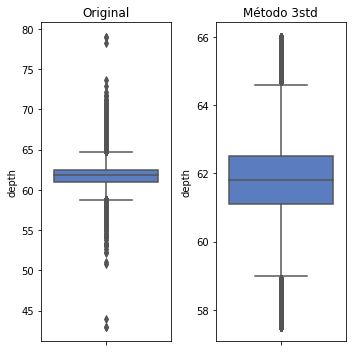

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(5,5))
sns.boxplot(data=diam_df,y='depth',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=diam_df1,y='depth',palette="muted",ax=axes[1])
axes[1].set_title("Método 3std")
plt.tight_layout()
plt.show()

In [ ]:
hous_df1 = drop_outliers_3std(hous_df,'MedInc')

## Tratamento com IQR

In [ ]:
def drop_outliers_iqr(df, field_name):
  df2 = df.copy()
  q1 = df2[field_name].quantile(.25)
  q3 = df2[field_name].quantile(.75) 
  iqr = q3- q1
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

In [ ]:
tips_df2 = drop_outliers_iqr(tips_df,'tip')

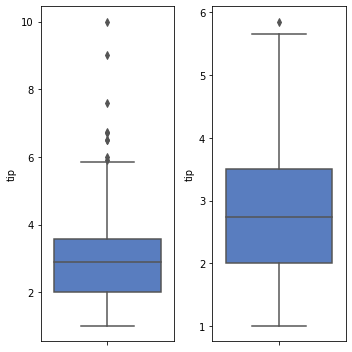

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(5,5))
sns.boxplot(data=tips_df,y='tip',palette="muted",ax=axes[0])
sns.boxplot(data=tips_df2,y='tip',palette="muted",ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
taxi_df2 = drop_outliers_iqr(taxi_df,'distance')

In [ ]:
def boxplots_pos_out(df,df2,col):
  fig, axes = plt.subplots(ncols=2, figsize=(5,5))
  sns.boxplot(data=df,y=col,palette="muted",ax=axes[0])
  sns.boxplot(data=df2,y=col,palette="muted",ax=axes[1])
  plt.tight_layout()
  plt.show()

<AxesSubplot:xlabel='distance', ylabel='Count'>

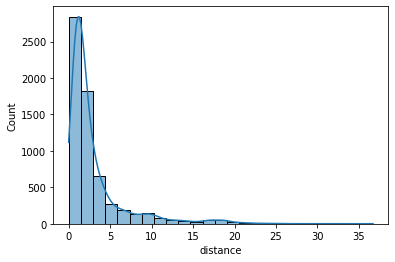

In [ ]:
sns.histplot(data=taxi_df['distance'], bins=25,kde=True)

<AxesSubplot:xlabel='distance', ylabel='Count'>

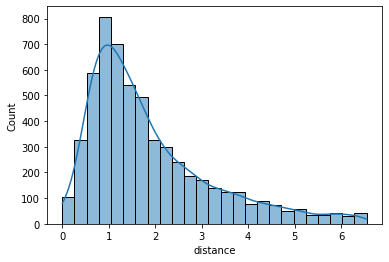

In [ ]:
sns.histplot(data=taxi_df2['distance'], bins=25,kde=True)

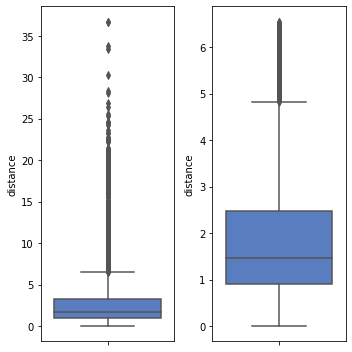

In [ ]:
boxplots_pos_out(taxi_df,taxi_df2,'distance')

In [ ]:
diam_df2 = drop_outliers_iqr(diam_df,'depth')

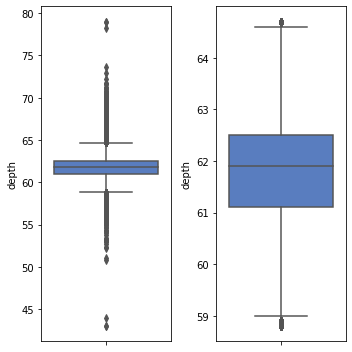

In [ ]:
boxplots_pos_out(diam_df,diam_df2,'depth')

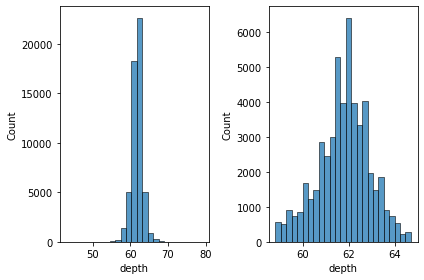

In [ ]:
fig, axes = plt.subplots(ncols=2)
sns.histplot(data=diam_df,x='depth',bins=25,ax=axes[0])
sns.histplot(data=diam_df2,x='depth',bins=25,ax=axes[1])
plt.tight_layout()

In [ ]:
hous_df2 = drop_outliers_iqr(hous_df,'MedInc')

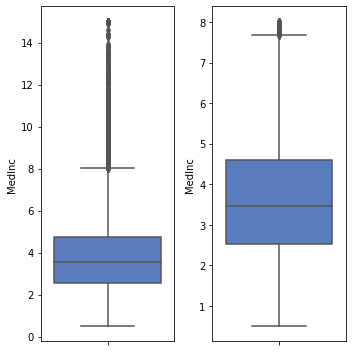

In [ ]:
boxplots_pos_out(hous_df,hous_df2,'MedInc')

## Tratamento com Z-score

In [ ]:
def drop_outliers_z(df,col,k=3):
  z_values = np.abs(stats.zscore(df[col]))
  return df[z_values < k]


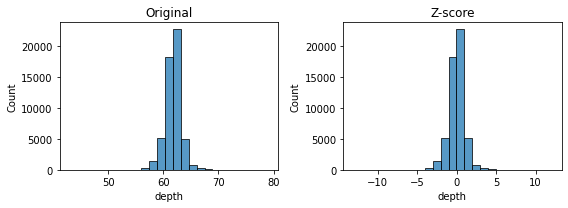

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(8,3))
sns.histplot(diam_df['depth'],bins=25,ax=axes[0])
axes[0].set(title="Original")
sns.histplot(stats.zscore(diam_df['depth']),bins=25,ax=axes[1])
axes[1].set(title="Z-score")
plt.tight_layout()

In [ ]:
diam_z=np.abs(stats.zscore(diam_df['depth']))

In [ ]:
diam_df3 = diam_df[diam_z<3]

In [ ]:
diam_df4 = drop_outliers_z(diam_df,'depth')

<AxesSubplot:xlabel='depth', ylabel='Count'>

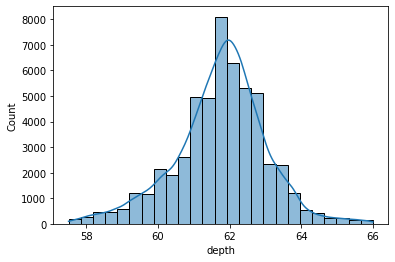

In [ ]:
sns.histplot(diam_df3['depth'],bins=25,kde=True)

<AxesSubplot:xlabel='depth', ylabel='Count'>

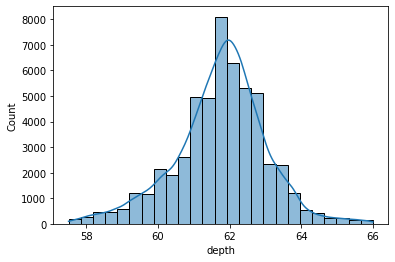

In [ ]:
sns.histplot(diam_df4['depth'],bins=25,kde=True)

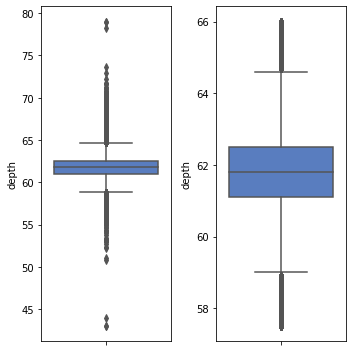

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(5,5))
sns.boxplot(data=diam_df,y='depth',palette="muted",ax=axes[0])
sns.boxplot(data=diam_df3,y='depth',palette="muted",ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
hous_z=np.abs(stats.zscore(hous_df['MedInc']))
hous_df3 = hous_df[hous_z<3]

In [ ]:
hous_df4 = drop_outliers_z(hous_df,'MedInc')

## Comparação entre os métodos


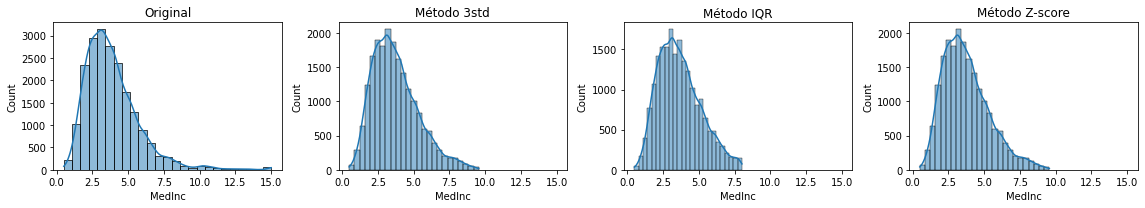

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(hous_df['MedInc'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(hous_df1['MedInc'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(hous_df2['MedInc'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(hous_df4['MedInc'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

<AxesSubplot:xlabel='MedInc', ylabel='Count'>

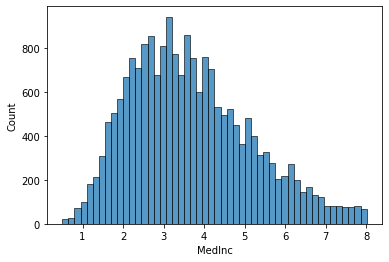

In [ ]:
sns.histplot(hous_df2['MedInc'],bins=50)

<AxesSubplot:xlabel='MedInc', ylabel='Count'>

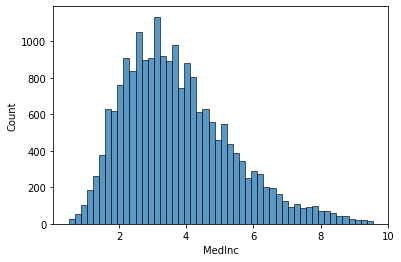

In [ ]:
sns.histplot(hous_df3['MedInc'],bins=50)

<AxesSubplot:xlabel='MedInc', ylabel='Count'>

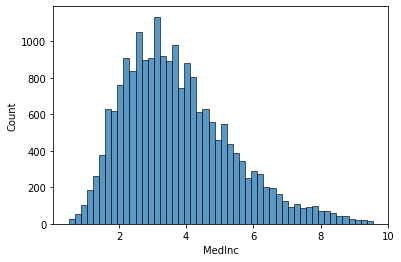

In [ ]:
sns.histplot(hous_df4['MedInc'],bins=50)

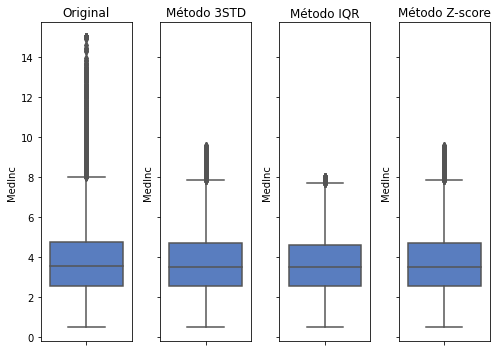

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=hous_df,y='MedInc',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=hous_df1,y='MedInc',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=hous_df2,y='MedInc',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=hous_df3,y='MedInc',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

# Transformação de Dados

Quando os atriubutos de um dataset estão em intervalos muito diferentes, calculos de distância podem ficar distorcidos. Por exemplo, a distância Euclideana pode ser dominada pelo atributo de maior intervalor (range)

Text(0.5, 1.0, 'Original')

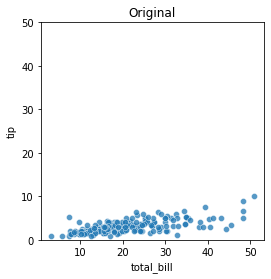

In [ ]:
plt.subplots(figsize=(4,4))
sns.scatterplot(data=tips_df,x='total_bill',y='tip',alpha=0.75)
plt.ylim(0,50)
plt.title("Original")

**Exemplo:** Calcular a distância do ponto (10,2) para o ponto (40,3), i.e., uma tupla onde alguém teve um total de 10 e deu 2 de gorjeta comparado com uma tupla com um total de 40 e 3 de gorjeta. Neste caso tempos:

$ dist = (10 - 40)^2 + (2-3)^2 = -30^2 + 1^2 = 900 + 1 = 901$

Logo a dimensão `total_bill` tem muito mais influência no calculo. 

Para que todas os atributos tenham a mesma influência é necessário reescalar os valores para que todas as faixas sejam similares. Vários algoritmos assumem que os dados já estão em uma mesma escala de valores, p. ex. SVM e algoritmos de clustering. 


In [ ]:
def euclid(x,y):
  diff = x - y;
  return np.sqrt((diff**2).sum());

## Dados Numéricos

### Normalização MinMax

$X_{scal} = \frac{X-X_{min}}{X_{max} - X_{min}}$

- Os dados são transformados para o intervalo (0,1)

In [ ]:
def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

In [ ]:
def min_max_scaling_df_columns(df, cols):
    for col in cols:
      df[col+"_scal"] = min_max_scaling(df[col])
    return df

In [ ]:
tips_df_scal1 = min_max_scaling_df_columns(tips_df.copy(),['total_bill','tip'])

Text(0.5, 1.0, 'MinMax')

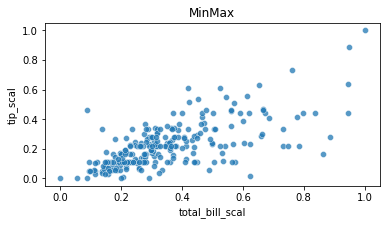

In [ ]:
plt.subplots(figsize=(6,3))
sns.scatterplot(data=tips_df_scal1,x='total_bill_scal',y='tip_scal',alpha=0.75)
plt.title("MinMax")

Apesar da transformação, a distribuição dos pontos é preservada

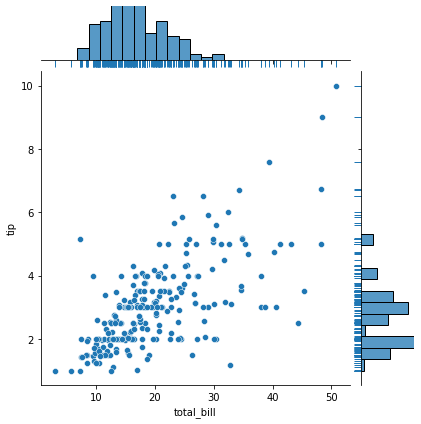

In [ ]:
g=sns.jointplot(data=tips_df,x='total_bill',y='tip',marginal_kws=dict(bins=25))
g.plot_marginals(sns.rugplot,clip_on=False,height=-.125)
plt.show()

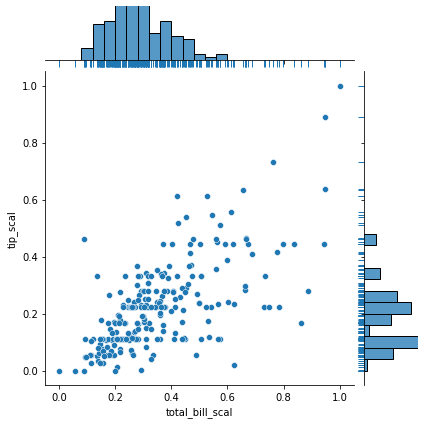

In [ ]:
g = sns.jointplot(data=tips_df_scal1,x='total_bill_scal',y='tip_scal',marginal_kws=dict(bins=25))
g.plot_marginals(sns.rugplot,clip_on=False,height=-.125)
plt.show()

### Efeito da escala sobre a distancia entre os pontos

Considere três tuplas no dataset tips.

In [ ]:
subset = tips_df_scal1.query(f'{37.5} < total_bill < {40} and {2}<tip<{6}')

In [ ]:
subset

,total_bill,tip,sex,smoker,day,time,size,total_bill_scal,tip_scal
56,38.01,3.0,Male,Yes,Sat,Dinner,4,0.731881,0.222222
112,38.07,4.0,Male,No,Sun,Dinner,3,0.733138,0.333333
207,38.73,3.0,Male,Yes,Sat,Dinner,4,0.746963,0.222222


Text(0.5, 1.0, 'Original')

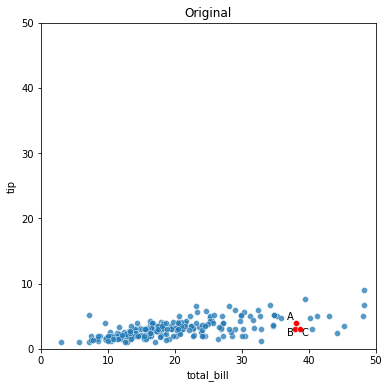

In [ ]:
plt.subplots(figsize=(6,6))
sns.scatterplot(data=tips_df,x='total_bill',y='tip',alpha=0.75)
sns.scatterplot(data=subset,x='total_bill',y='tip',color='red')
plt.ylim(0,50)
plt.xlim(0,50)
plt.text(36.7,2,'B')
plt.text(36.7,4.5,'A')
plt.text(39,2,'C')
plt.title("Original")

Text(0.5, 1.0, 'MinMax')

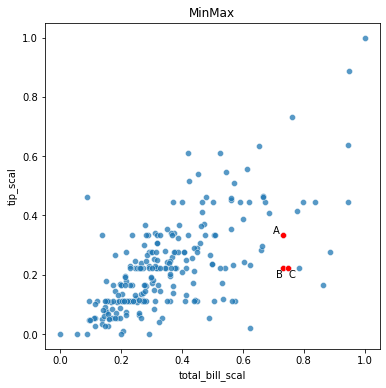

In [ ]:
plt.subplots(figsize=(6,6))
sns.scatterplot(data=tips_df_scal1,x='total_bill_scal',y='tip_scal',alpha=0.75)
sns.scatterplot(data=subset,x='total_bill_scal',y='tip_scal',color='red')
plt.text(0.71,0.19,'B')
plt.text(0.70,0.34,'A')
plt.text(0.75,0.19,'C')

plt.title("MinMax")

In [ ]:
a = tips_df_scal1.loc[56,['total_bill','tip']].astype('float')
b = tips_df_scal1.loc[207,['total_bill','tip']].astype('float')
c = tips_df_scal1.loc[112,['total_bill','tip']].astype('float')
a_s = tips_df_scal1.loc[56,['total_bill_scal','tip_scal']].astype('float')
b_s = tips_df_scal1.loc[207,['total_bill_scal','tip_scal']].astype('float')
c_s = tips_df_scal1.loc[112,['total_bill_scal','tip_scal']].astype('float')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
with np.printoptions(precision=2,suppress=True):
  print(f"d({a.values},{b.values}) = {euclid(a.values,b.values):0.2f}")
  print(f'd({c.values},{b.values}) = {euclid(c.values,b.values):0.2f}')
  print(f'd({a_s.values},{b_s.values}) = {euclid(a_s.values,b_s.values):0.2f}')
  print(f'd({c_s.values},{b_s.values}) = {euclid(c_s.values,b_s.values):0.2f}')

d([38.01  3.  ],[38.73  3.  ]) = 0.72
d([38.07  4.  ],[38.73  3.  ]) = 1.20
d([0.73 0.22],[0.75 0.22]) = 0.02
d([0.73 0.33],[0.75 0.22]) = 0.11


A distancia de A para B (d=0.72) era similar a distancia de C para B (d=1.20). Após a transformação, a distancia de B para C  (0.11) é cerca de 5x  maior que a distancia de A para B (d=0.02). Desse modo, um algoritmos pode encontrar mais similaridade com os dados transoformados

### Standardization

Esta transformação faz com que os dados tenham média $0$ e desvio padrão $1$. É obtido com a seguinte fórmula:

$X_z = \frac{X - \mu}{\sigma}$

onde $\mu$ é média de $X$ e $\sigma$ é o desvio padrão de $X$

In [ ]:
def standard_scaling(x):
    return (x - x.mean()) / x.std()

In [ ]:
df = tips_df.copy()
cols = ['total_bill','tip']

for col in cols:
    df[col] = standard_scaling(df[col])

In [ ]:
def standard_scaling_df_columns(df, columns):
    for col in cols:
      df[col+"_scal"] = standard_scaling(df[col])
    return df

In [ ]:
tips_df_scal2 = standard_scaling_df_columns(tips_df.copy(),['total_bill','tip'])

Text(0.5, 1.0, 'Standard (z-score)')

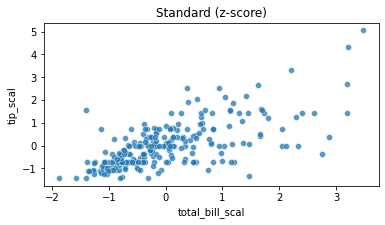

In [ ]:
plt.subplots(figsize=(6,3))
sns.scatterplot(data=tips_df_scal2,x='total_bill_scal',y='tip_scal',alpha=0.75)
plt.title("Standard (z-score)")

## Comparação

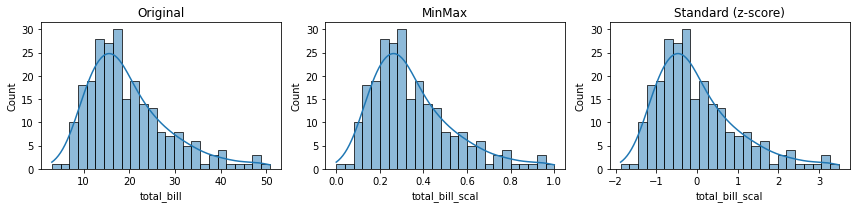

In [ ]:
fig,axes=plt.subplots(ncols=3,figsize=(12,3))
sns.histplot(tips_df['total_bill'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(tips_df_scal1['total_bill_scal'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("MinMax")
sns.histplot(tips_df_scal2['total_bill_scal'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Standard (z-score)")
plt.tight_layout()

### Usando `sklearn.preprocessing`

In [ ]:
def gen_scaler_df_columns(scaler, df, columns):
    # Scale the specified columns
    scaled_data = scaler.fit_transform(df[columns])

    # Add the scaled data to the new DataFrame
    for i, col in enumerate(columns):
        df[col+"_scal"] = scaled_data[:, i]

    return df

In [ ]:
df = tips_df.copy()
cols = ['total_bill','tip']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[cols])

for i, col in enumerate(cols):
        df[col] = scaled_data[:, i]

In [ ]:
minmax_scaler = MinMaxScaler()
tips_df_scal3 = gen_scaler_df_columns(minmax_scaler,tips_df.copy(),['total_bill','tip'])

Text(0.5, 1.0, 'MinMax Scaler sklearn')

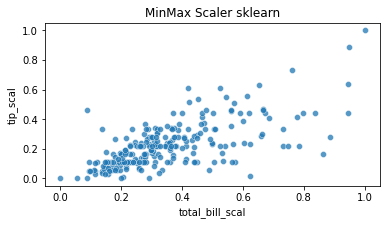

In [ ]:
plt.subplots(figsize=(6,3))
sns.scatterplot(data=tips_df_scal3,x='total_bill_scal',y='tip_scal',alpha=0.75)
plt.title("MinMax Scaler sklearn")

In [ ]:
z_scaler = StandardScaler()
tips_df_scal4 = gen_scaler_df_columns(z_scaler,tips_df.copy(),['total_bill','tip'])

Text(0.5, 1.0, 'Standard Scaler sklearn')

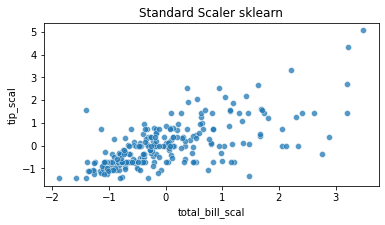

In [ ]:
plt.subplots(figsize=(6,3))
sns.scatterplot(data=tips_df_scal4,x='total_bill_scal',y='tip_scal',alpha=0.75)
plt.title("Standard Scaler sklearn")

In [ ]:
rob_scaler = RobustScaler()
tips_df_scal5 = gen_scaler_df_columns(rob_scaler,tips_df.copy(),['total_bill','tip'])

Text(0.5, 1.0, 'Robust Scaler sklearn')

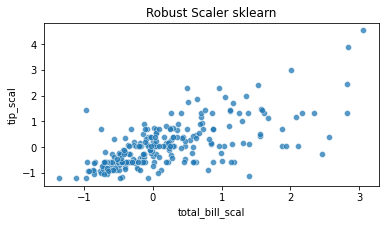

In [ ]:
plt.subplots(figsize=(6,3))
sns.scatterplot(data=tips_df_scal5,x='total_bill_scal',y='tip_scal',alpha=0.75)
plt.title("Robust Scaler sklearn")

## Dados Categóricos

Dados categóricos representam elementos de uma coleção limitada de valores, geralmente sem uma ordem. 

Exemplos
 - cores = {amarelo, verde, vermelho, azul}, 
 - bandeira = {visa, mastercard}, 
 - estado = {acre, amapá, alagoas, ... , DF}. 

Algumas vezes dados categóricos podem ter ordem. Ex: tamanhos = {P, M, G, GG, XL}

Dados categóricos são chamados de:
 - **nominais**, quando não possuem ordem e 
 - **ordinais**, quando possuem ordem.

Podemos atribuir números para dados categóricos, mas devemos lembrar que os números não representam grandezas numéricas, apenas código. Portanto, não se pode realizar operações aritméticas com dados categóricos, apenas contagem.

O pandas armazena dados categóricos com menos espaço em memória.  

Transformação de dados categóricos são uteis para preparação para analise de regressão além de outros algoritmos de aprendizagem de máquina que exigem entrada de tipo numérico. 

### Pandas replace

É possível condificar manualmente utilizando um dicinário python e o método replace.

In [ ]:
mapa_fumante = {'No':0,'Yes':1}

In [ ]:
tips_df['smoker_code'] = tips_df.smoker.replace(mapa_fumante)

In [ ]:
tips_df.sample(n=10)

,total_bill,tip,sex,smoker,day,time,size,smoker_code
109,14.31,4.00,Female,Yes,Sat,Dinner,2,1
77,27.20,4.00,Male,No,Thur,Lunch,4,0
190,15.69,1.50,Male,Yes,Sun,Dinner,2,1
200,18.71,4.00,Male,Yes,Thur,Lunch,3,1
29,19.65,3.00,Female,No,Sat,Dinner,2,0
70,12.02,1.97,Male,No,Sat,Dinner,2,0
161,12.66,2.50,Male,No,Sun,Dinner,2,0
24,19.82,3.18,Male,No,Sat,Dinner,2,0
171,15.81,3.16,Male,Yes,Sat,Dinner,2,1
205,16.47,3.23,Female,Yes,Thur,Lunch,3,1


### Categorias no Pandas

Códigos para dados categóricos nominais com pandas podem ser obtidos com o atributo .codes em um tipo category 

In [ ]:
tips_df['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
tips_df['day_cat'] = tips_df['day'].cat.codes

In [ ]:
tips_df.sample(n=10)

,total_bill,tip,sex,smoker,day,time,size,smoker_code,day_cat
130,19.08,1.50,Male,No,Thur,Lunch,2,0,0
21,20.29,2.75,Female,No,Sat,Dinner,2,0,2
151,13.13,2.00,Male,No,Sun,Dinner,2,0,3
198,13.00,2.00,Female,Yes,Thur,Lunch,2,1,0
222,8.58,1.92,Male,Yes,Fri,Lunch,1,1,1
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3,1,3
144,16.43,2.30,Female,No,Thur,Lunch,2,0,0
15,21.58,3.92,Male,No,Sun,Dinner,2,0,3
90,28.97,3.00,Male,Yes,Fri,Dinner,2,1,1


Se a coluna não for do tipo category, é possivel ainda assim fazer uma mudança de tipo apenas para conseguir os códigos

In [ ]:
codes =  taxi_df['dropoff_borough'].astype('category').cat.codes

In [ ]:
taxi_df['dropoff_borough_code'] = codes

In [ ]:
taxi_df[['dropoff_borough','dropoff_borough_code']].sample(n=5)

,dropoff_borough,dropoff_borough_code
2091,Manhattan,2
6315,Brooklyn,1
6058,Manhattan,2
2649,Manhattan,2
3899,Manhattan,2


Se a coluna já for tipo category mas não tem uma ordem, pode-se definir uma ordem.

In [ ]:
diam_df['clarity'].cat.ordered

False

In [ ]:
c = diam_df['clarity'].cat.categories.values.tolist()
print(c)

['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


In [ ]:
c.reverse()
print(c)

['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


In [ ]:
diam_df['clarity']=diam_df['clarity'].cat.set_categories(c,ordered=True)

Com dados categóricos ordenados é possível fazer comparações do tipo maior, menor, max, min, etc.

In [ ]:
filtro = diam_df['clarity']>='VVS2'
diam_df[filtro].sample(n=5)

,carat,cut,color,clarity,depth,table,price,x,y,z
36697,0.34,Ideal,G,IF,61.10,57.00,952,4.47,4.51,2.75
31640,0.25,Very Good,H,VVS1,60.10,62.00,450,4.08,4.11,2.46
44956,0.58,Very Good,I,VVS1,63.00,57.00,1636,5.29,5.34,3.35
6775,0.81,Ideal,H,IF,61.60,58.00,4111,5.98,6.01,3.69
3788,0.74,Ideal,G,VVS2,62.20,57.00,3462,5.75,5.79,3.59


Com categorias ordenadas é possivel gerar gráficos mais informativos

<AxesSubplot:>

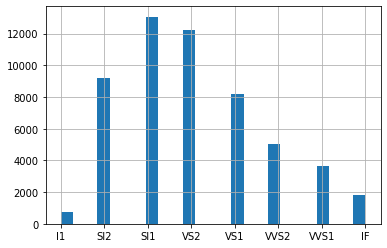

In [ ]:
diam_df['clarity'].sort_values().hist(bins=25)

### Dummies

Para dados nominais a melhor prática é criar variáveis indicadoras, binárias, ou dummies. 

In [ ]:
pd.get_dummies(auto_df['num-of-cylinders']).sample(n=5)

,eight,five,four,six,three,twelve,two
6,0,1,0,0,0,0,0
202,0,0,0,1,0,0,0
49,0,0,0,0,0,1,0
189,0,0,1,0,0,0,0
53,0,0,1,0,0,0,0


### Categorias com sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

Dados ordinais podem ser convertidos com OrdinalEncoder. Dados nominais podem ser convertidos com OHE. 

Ordinal Encoding

In [ ]:
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
auto_df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
auto_df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
auto_df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
ord = OrdinalEncoder()

In [ ]:
transf_ord = ord.fit_transform(auto_df[['drive-wheels',
                                        'num-of-cylinders', 
                                        'make' ]])

In [ ]:
transf_ord[:5]

array([[2., 2., 0.],
       [2., 2., 0.],
       [2., 3., 0.],
       [1., 2., 1.],
       [0., 1., 1.]])

In [ ]:
ord.feature_names_in_

array(['drive-wheels', 'num-of-cylinders', 'make'], dtype=object)

Teste com os primeiros valores transformados

In [ ]:
ord.inverse_transform(transf_ord[:5].reshape(-1,3))

array([['rwd', 'four', 'alfa-romero'],
       ['rwd', 'four', 'alfa-romero'],
       ['rwd', 'six', 'alfa-romero'],
       ['fwd', 'four', 'audi'],
       ['4wd', 'five', 'audi']], dtype=object)

Teste com um valor codificado fictício

In [ ]:
ord.inverse_transform(np.array([[1,3,0]]))

array([['fwd', 'six', 'alfa-romero']], dtype=object)

One Hot Encoding 

In [ ]:
ohe = OneHotEncoder(sparse=False)

In [ ]:
transf_ohe = ohe.fit_transform(taxi_df[['dropoff_borough']])

In [ ]:
ohe.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', nan],
       dtype=object)]

In [ ]:
ohe.get_feature_names_out()

array(['dropoff_borough_Bronx', 'dropoff_borough_Brooklyn',
       'dropoff_borough_Manhattan', 'dropoff_borough_Queens',
       'dropoff_borough_Staten Island', 'dropoff_borough_nan'],
      dtype=object)

In [ ]:
transf_ohe[:5]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
taxi_df.query('dropoff_borough != "Manhattan"')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,droppoff_borough_code
10,2019-03-16 10:02:25,2019-03-16 10:22:29,1,3.90,17.00,0.00,0.00,17.80,yellow,cash,LaGuardia Airport,Astoria,Queens,Queens,3
40,2019-03-07 15:15:46,2019-03-07 15:50:14,1,7.51,27.00,6.06,0.00,36.36,yellow,credit card,Flatiron,Carroll Gardens,Manhattan,Brooklyn,1
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.00,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN,-1
53,2019-03-20 18:49:24,2019-03-20 19:12:40,1,13.45,36.00,0.00,0.00,37.80,yellow,cash,JFK Airport,Sunnyside,Queens,Queens,3
75,2019-03-17 01:28:28,2019-03-17 02:04:54,1,7.95,30.00,0.00,0.00,33.80,yellow,cash,Flatiron,Jackson Heights,Manhattan,Queens,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,2019-03-07 15:34:30,2019-03-07 16:31:06,1,9.12,26.32,0.00,0.00,26.82,green,credit card,Park Slope,East New York,Brooklyn,Brooklyn,1
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.00,0.00,0.00,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,0
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.00,0.00,0.00,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,1
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.00,0.00,0.00,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,1


In [ ]:
ohe.inverse_transform(transf_ohe[10].reshape(-1,6))

array([['Queens']], dtype=object)

# Referencias
Livros
- McKINNEY, Wes. "Python for Data Analysis". O'Reilly, 2017.
- VANDERPLASS, Jake. "Python Data Science Handbook". O'Reilly, 2016.
- HARRISON, Matt. “Machine Learning: guia de referencia rápida”. Novatec, 2020.
- CHEN, Daniel Y. “Analise de Dados com Python e Pandas”. Novatec, 2018.

Links

- https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
- https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
- https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02
- https://www.pluralsight.com/guides/preparing-data-modeling-scikit-learn/
- https://www.pluralsight.com/guides/cleaning-up-data-from-outliers